In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_M.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [4]:
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar DataFrame para mantener solo esas columnas
df = df[columnas_a_conservar]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      26582 non-null  object 
 1   room_type                  26582 non-null  object 
 2   review_scores_cleanliness  26582 non-null  object 
 3   host_acceptance_rate       26582 non-null  object 
 4   host_identity_verified     26582 non-null  object 
 5   host_is_superhost          26582 non-null  object 
 6   instant_bookable           26582 non-null  object 
 7   accommodates               26582 non-null  float64
 8   bathrooms                  26582 non-null  float64
 9   property_type              26582 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.0+ MB


In [6]:
df=df
df['room_type'] = df['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [7]:
import re
df['price']= df['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [8]:
sorted_values = df['price'].sort_values(ascending=True)
sorted_values

25879     0.0
26561    50.0
6485     68.0
6899     70.0
26336    70.0
         ... 
25759     NaN
25796     NaN
25900     NaN
25905     NaN
25906     NaN
Name: price, Length: 26582, dtype: float64

In [9]:
df = df[df['price'] <40000]

In [10]:
df1 = df[df["room_type"] ==1]

In [11]:

Y= df1['price']
X1= df1['room_type'].to_frame()

In [12]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
type(model)

sklearn.linear_model._base.LinearRegression

In [14]:
model.fit(X=X1, y=Y)

LinearRegression()

In [15]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1719.2226199447375)}

In [16]:

y_pred= model.predict(X=X1)
y_pred

array([1719.22261994, 1719.22261994, 1719.22261994, ..., 1719.22261994,
       1719.22261994, 1719.22261994], shape=(15924,))

<Axes: xlabel='room_type', ylabel='price'>

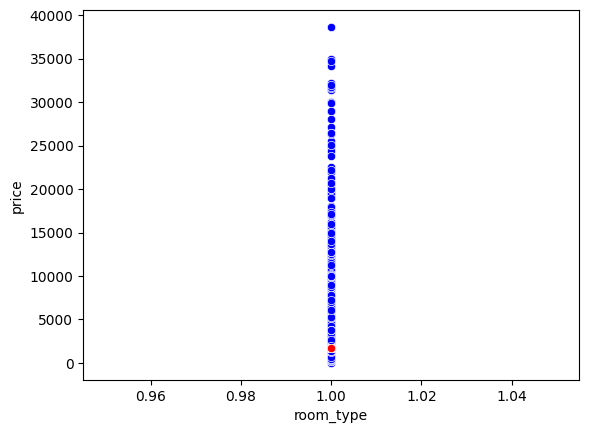

In [17]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [18]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [19]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [20]:
import re
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\4158902744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [21]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].fillna(50)

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\77113670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = df1['host_acceptance_rate'].fillna(50)


In [22]:

Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [23]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [24]:
sorted_values = df1['host_acceptance_rate'].sort_values(ascending=True)
sorted_values

14481      0.0
14952      0.0
15327      0.0
15030      0.0
14608      0.0
         ...  
45       100.0
44       100.0
43       100.0
26581    100.0
3        100.0
Name: host_acceptance_rate, Length: 15924, dtype: float64

In [25]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [26]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.92872363]),
 'rank_': 1,
 'singular_': array([2605.47855211]),
 'intercept_': np.float64(1894.2266735743974)}

In [27]:
y_pred2= model2.predict(X=X2)
y_pred2

array([1797.79049224, 1784.28942686, 1701.35431091, ..., 1797.79049224,
       1701.35431091, 1701.35431091], shape=(15924,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

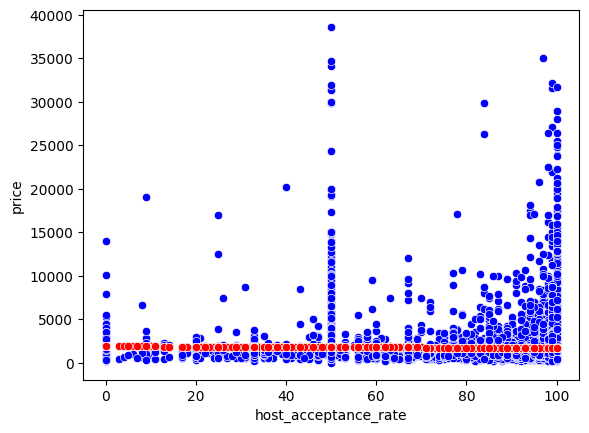

In [28]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [29]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.00037584045040406355

In [30]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.019386604922060582)

In [31]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\4038004741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [32]:

Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [33]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [34]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [35]:
y_pred3= model3.predict(X=X3)
y_pred3

array([1708.74904807, 1730.92739362, 1730.92739362, ..., 1708.74904807,
       1708.74904807, 1730.92739362], shape=(15924,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

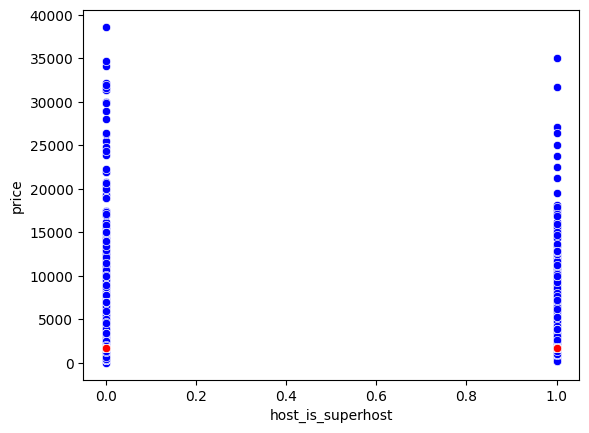

In [36]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [37]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

2.905350416448904e-05

In [38]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.005390130254872236)

In [39]:

Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [40]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [41]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [42]:
y_pred4= model4.predict(X=X4)
y_pred4

array([3.03165351, 3.03165351, 3.03165351, ..., 3.03165351, 3.03165351,
       3.03165351], shape=(15924,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

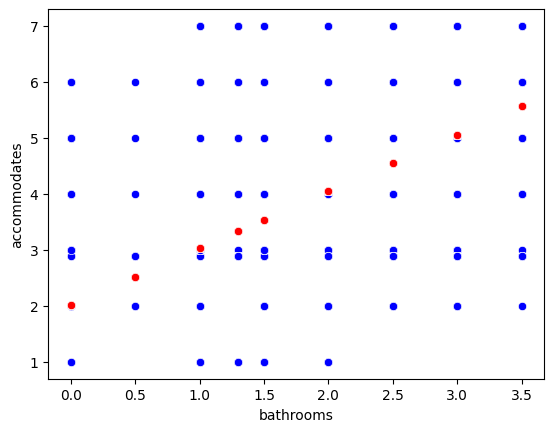

In [43]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [44]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.19781275840712242

In [45]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.4447614623673261)

In [ ]:
import re
df1['review_scores_cleanliness'] = df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [ ]:
# Calcular el promedio de la columna 'review_scores_cleanliness' excluyendo los NaN
mean_value = df1['review_scores_cleanliness'].mean()

# Reemplazar los valores NaN o None con el promedio calculado
df1['review_scores_cleanliness'] = df1['review_scores_cleanliness'].fillna(mean_value)

In [50]:

Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [51]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [53]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [54]:
y_pred5= model5.predict(X=X5)
y_pred5

array([1719.22261994, 1717.6528208 , 1727.34555982, ..., 1719.22261994,
       1719.22261994, 1719.22261994], shape=(15924,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

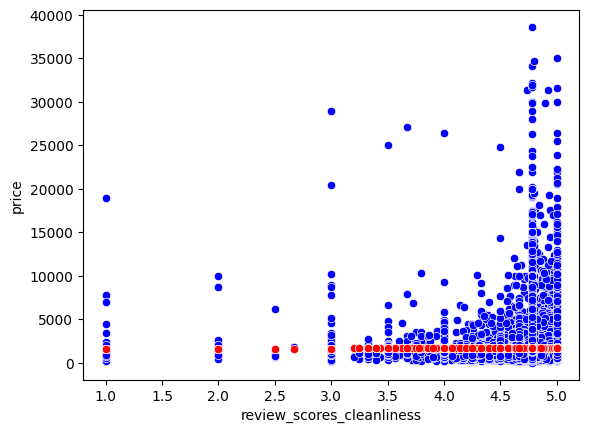

In [55]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [56]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

4.3479469696849904e-05

In [57]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.006593896397188077)

In [58]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\3355181784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [59]:

Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [60]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [61]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [62]:
y_pred6= model6.predict(X=X6)
y_pred6

array([1720.21920681, 1720.21920681, 1720.21920681, ..., 1720.21920681,
       1720.21920681, 1720.21920681], shape=(15924,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

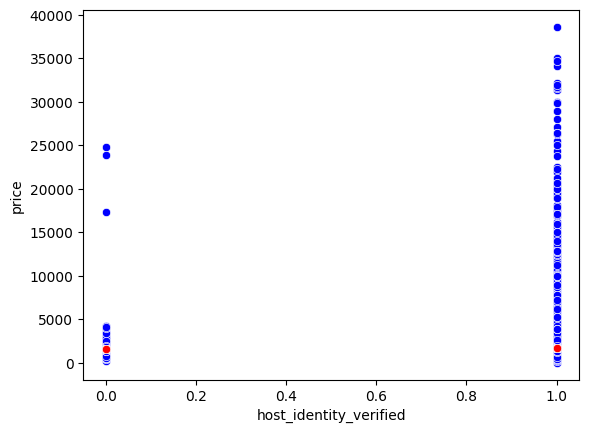

In [63]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [64]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

1.949200654072225e-05

In [65]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.004414975259355623)

In [66]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1876949163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [67]:

Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [68]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [69]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [70]:
y_pred7= model7.predict(X=X7)
y_pred7

array([1664.56380589, 1664.56380589, 1664.56380589, ..., 1664.56380589,
       1788.51523782, 1788.51523782], shape=(15924,))

<Axes: xlabel='instant_bookable', ylabel='price'>

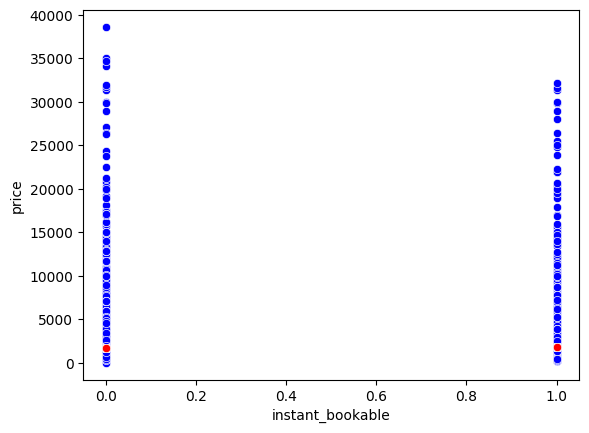

In [71]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [72]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.000897610360159673

In [73]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.029960146197234635)

In [75]:
unique_property_types = df1['property_type'].unique()

# Mostrar los valores únicos
print(unique_property_types)

['Entire villa' 'Entire rental unit' 'Entire loft' 'Entire home'
 'Entire condo' 'Entire guest suite' 'Entire serviced apartment'
 'Tiny home' 'Entire bungalow' 'Casa particular' 'Entire guesthouse'
 'Entire townhouse' 'Entire cabin' 'Room in aparthotel' 'Entire place'
 'Earthen home' 'Entire hostel' 'Entire cottage' 'Entire chalet'
 'Entire in-law' 'Holiday park' 'Campsite' 'Castle' 'Farm stay' 'Hut'
 'Entire home/apt' 'Entire vacation home' 'Shipping container' 'Dome'
 'Tent' 'Boat' 'Tower' 'Room in hotel']


In [76]:
df1['property_type'] = df1['property_type'].replace({
    'Entire villa': 1,
    'Entire rental unit': 2,
    'Entire loft': 3,
    'Entire home': 4,
    'Entire condo': 5,
    'Entire guest suite': 6,
    'Entire serviced apartment': 7,
    'Tiny home': 8,
    'Entire bungalow': 9,
    'Casa particular': 10,
    'Entire guesthouse': 11,
    'Entire townhouse': 12,
    'Entire cabin': 13,
    'Room in aparthotel': 14,
    'Entire place': 15,
    'Earthen home': 16,
    'Entire hostel': 17,
    'Entire cottage': 18,
    'Entire chalet': 19,
    'Entire in-law': 20,
    'Holiday park': 21,
    'Campsite': 22,
    'Castle': 23,
    'Farm stay': 24,
    'Hut': 25,
    'Entire home/apt': 26,
    'Entire vacation home': 27,
    'Shipping container': 28,
    'Dome': 29,
    'Tent': 30,
    'Boat': 31,
    'Tower': 32,
    'Room in hotel': 33
})

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1047644404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({
C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1047644404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({


In [77]:

Y8= df1['price']
X8= df1['property_type'].to_frame()

In [78]:
df1['property_type'] = df1['property_type'].replace({...}).astype(float)

C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1373559198.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)
C:\Users\blanf\AppData\Local\Temp\ipykernel_24764\1373559198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)


In [79]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [80]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [81]:
y_pred8= model8.predict(X=X8)
y_pred8

array([1731.04298471, 1726.35814503, 1726.35814503, ..., 1726.35814503,
       1726.35814503, 1726.35814503], shape=(15924,))

<Axes: xlabel='property_type', ylabel='price'>

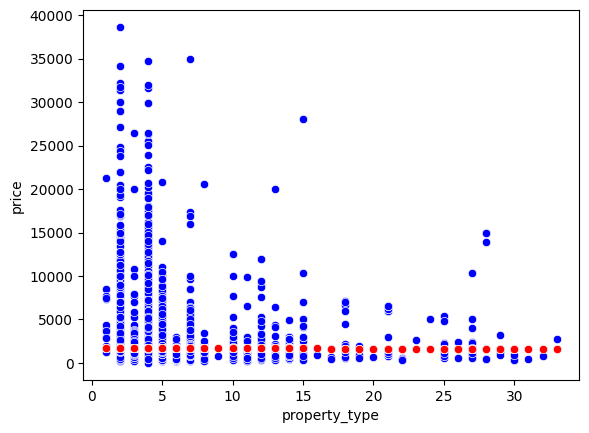

In [82]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [83]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

4.9239505275577855e-05

In [84]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.007017086665816367)

In [85]:
df1 = df1.drop('room_type', axis=1)

In [86]:
df1.insert(0, 'Predicción_Host_acceptance_rate', y_pred2)
df1.insert(1, 'Predicción_Host_is_superhost', y_pred3)
df1.insert(2, 'Predicción_accommodates', y_pred4)
df1.insert(3, 'Predicción_review_scores_cleanliness', y_pred5)
df1.insert(4, 'Predicción_host_identity_verified', y_pred6)
df1.insert(5, 'Predicción_instant_bookable', y_pred7)
df1.insert(6, 'Predicción_property_type', y_pred8)

In [87]:
Corr_Factors=df1.corr()
Corr_Factors

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,-0.312744,0.022150,-0.064470,-0.010666,-0.288870,0.007874,0.019387,-0.064470,-1.000000,-0.010666,-0.312744,-0.288870,-0.026913,0.022150,-0.007874
Predicción_Host_is_superhost,-0.312744,1.000000,0.037007,0.203239,0.024012,0.027339,-0.048457,0.005390,0.203239,0.312744,0.024012,1.000000,0.027339,0.033134,0.037007,0.048457
Predicción_accommodates,0.022150,0.037007,1.000000,0.029751,0.017769,-0.013866,0.009454,0.260509,0.029751,-0.022150,0.017769,0.037007,-0.013866,0.444761,1.000000,-0.009454
Predicción_review_scores_cleanliness,-0.064470,0.203239,0.029751,1.000000,0.003102,-0.057407,-0.017533,0.006594,1.000000,0.064470,0.003102,0.203239,-0.057407,0.014825,0.029751,0.017533
Predicción_host_identity_verified,-0.010666,0.024012,0.017769,0.003102,1.000000,-0.007241,0.009326,0.004415,0.003102,0.010666,1.000000,0.024012,-0.007241,-0.000447,0.017769,-0.009326
Predicción_instant_bookable,-0.288870,0.027339,-0.013866,-0.057407,-0.007241,1.000000,0.056454,0.029960,-0.057407,0.288870,-0.007241,0.027339,1.000000,-0.012379,-0.013866,-0.056454
Predicción_property_type,0.007874,-0.048457,0.009454,-0.017533,0.009326,0.056454,1.000000,0.007017,-0.017533,-0.007874,0.009326,-0.048457,0.056454,0.024101,0.009454,-1.000000
price,0.019387,0.005390,0.260509,0.006594,0.004415,0.029960,0.007017,1.000000,0.006594,-0.019387,0.004415,0.005390,0.029960,0.114845,0.260509,-0.007017
review_scores_cleanliness,-0.064470,0.203239,0.029751,1.000000,0.003102,-0.057407,-0.017533,0.006594,1.000000,0.064470,0.003102,0.203239,-0.057407,0.014825,0.029751,0.017533
host_acceptance_rate,-1.000000,0.312744,-0.022150,0.064470,0.010666,0.288870,-0.007874,-0.019387,0.064470,1.000000,0.010666,0.312744,0.288870,0.026913,-0.022150,0.007874


In [88]:
#Convierte todo a positivo :(
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,0.312744,0.022150,0.064470,0.010666,0.288870,0.007874,0.019387,0.064470,1.000000,0.010666,0.312744,0.288870,0.026913,0.022150,0.007874
Predicción_Host_is_superhost,0.312744,1.000000,0.037007,0.203239,0.024012,0.027339,0.048457,0.005390,0.203239,0.312744,0.024012,1.000000,0.027339,0.033134,0.037007,0.048457
Predicción_accommodates,0.022150,0.037007,1.000000,0.029751,0.017769,0.013866,0.009454,0.260509,0.029751,0.022150,0.017769,0.037007,0.013866,0.444761,1.000000,0.009454
Predicción_review_scores_cleanliness,0.064470,0.203239,0.029751,1.000000,0.003102,0.057407,0.017533,0.006594,1.000000,0.064470,0.003102,0.203239,0.057407,0.014825,0.029751,0.017533
Predicción_host_identity_verified,0.010666,0.024012,0.017769,0.003102,1.000000,0.007241,0.009326,0.004415,0.003102,0.010666,1.000000,0.024012,0.007241,0.000447,0.017769,0.009326
Predicción_instant_bookable,0.288870,0.027339,0.013866,0.057407,0.007241,1.000000,0.056454,0.029960,0.057407,0.288870,0.007241,0.027339,1.000000,0.012379,0.013866,0.056454
Predicción_property_type,0.007874,0.048457,0.009454,0.017533,0.009326,0.056454,1.000000,0.007017,0.017533,0.007874,0.009326,0.048457,0.056454,0.024101,0.009454,1.000000
price,0.019387,0.005390,0.260509,0.006594,0.004415,0.029960,0.007017,1.000000,0.006594,0.019387,0.004415,0.005390,0.029960,0.114845,0.260509,0.007017
review_scores_cleanliness,0.064470,0.203239,0.029751,1.000000,0.003102,0.057407,0.017533,0.006594,1.000000,0.064470,0.003102,0.203239,0.057407,0.014825,0.029751,0.017533
host_acceptance_rate,1.000000,0.312744,0.022150,0.064470,0.010666,0.288870,0.007874,0.019387,0.064470,1.000000,0.010666,0.312744,0.288870,0.026913,0.022150,0.007874


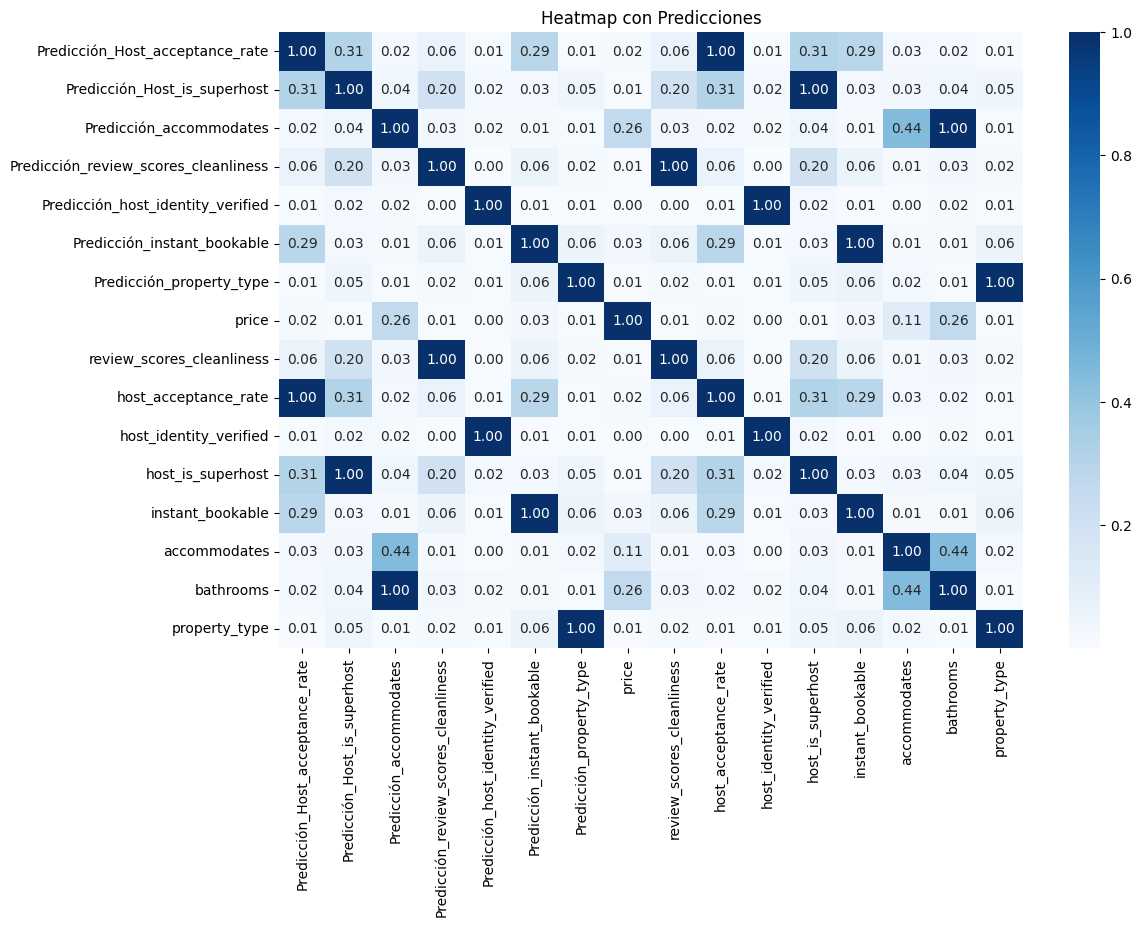

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()
